In [1]:
%config Completer.use_jedi = False
%matplotlib inline
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_rows', 100)

# Load test data

In [2]:
def load_dataset():
    ds = pd.read_csv("../../data/dataset.csv")
    ds.replace([np.inf, -np.inf], np.nan, inplace=True) # we treat infinite values as NaN
    ds = ds.loc[~ds.order_voucher_percentage__mean.isna(),:]
    return ds

def get_features_and_labels(ds):
    non_features_cols = ["customer_id", "is_returning_customer", "split"]
    feature_cols = [c for c in ds.columns if c not in non_features_cols]
    
    X = ds[feature_cols] # features
    y = ds.is_returning_customer # labels
    return X, y

In [3]:
ds = load_dataset()
X_test, y_test = get_features_and_labels(ds.query("split == 'test'"))

In [4]:
(X_test.shape, y_test.shape)

((48916, 59), (48916,))

# Load model

In [5]:
from joblib import load
clf = load('fitted_clf.joblib')

# Compute permutation importance

In [6]:
from sklearn.inspection import permutation_importance

In [8]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight="balanced", y=y_test)
sample_weights

array([0.64485341, 0.64485341, 0.64485341, ..., 2.22588278, 0.64485341,
       2.22588278])

In [11]:
result = permutation_importance(clf, X_test, y_test,
                                n_repeats=10, random_state=12345,
                                sample_weight=sample_weights, scoring="f1",
                                n_jobs=-1)

In [31]:
sorted_idx = result.importances_mean.argsort()[-n_features:]
top_features = np.array(X_test.columns)[sorted_idx]
top_importances = result.importances[sorted_idx].T

In [32]:
top_importances.shape

(10, 20)

In [33]:
top_features

array(['n_order_hour_0', 'voucher_amount__min', 'n_order_hour_15',
       'n_order_hour_23', 'n_order_hour_14', 'days_since_first_order',
       'voucher_amount__max', 'order_voucher_percentage__min',
       'order_voucher_percentage__median',
       'order_amount_paid_log10__mean', 'order_amount_paid_log10__median',
       'n_order_hour_17', 'order_voucher_percentage__max',
       'order_amount_paid_log10__min', 'delivery_fee__mean',
       'n_order_date_dayofweek_3', 'delivery_fee_not_zero__mean',
       'failed_order__mean', 'order__count', 'days_since_last_order'],
      dtype=object)

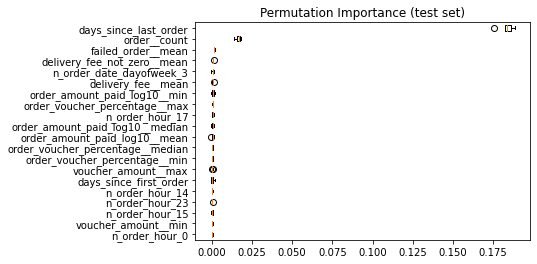

In [34]:
import matplotlib.pyplot as plt

plt.boxplot(top_importances,
            labels=top_features,
            vert=False)
plt.title("Permutation Importance (test set)")
plt.show()

**TODO**: Shap analysis